In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

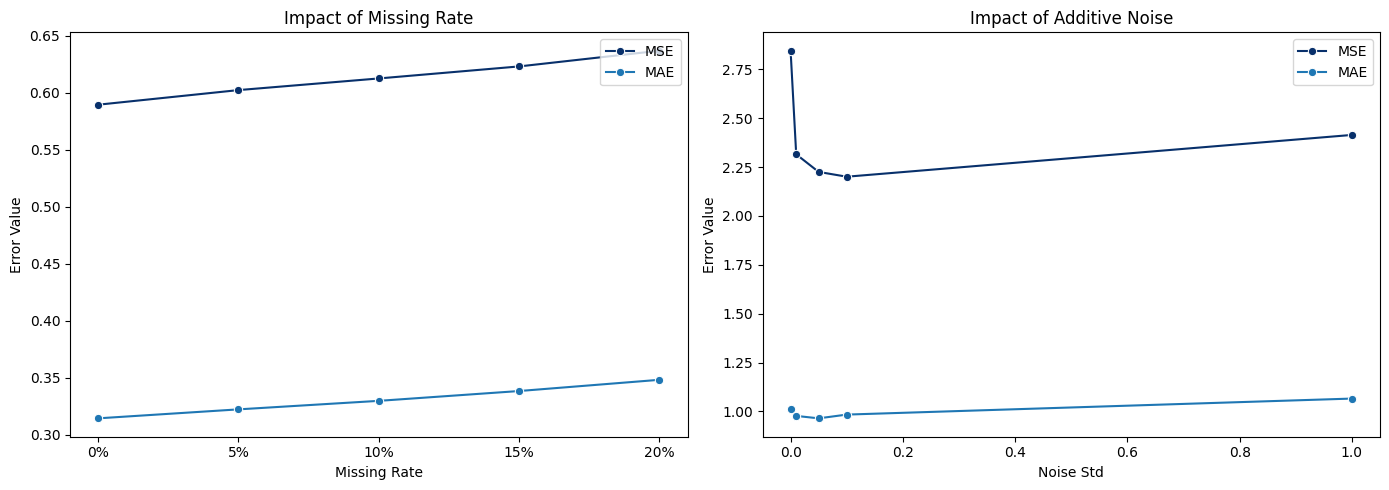

In [2]:
custom_blue_palette = ['#08306B', '#1f77b4']

file_path = "5104tables.xlsx"
df_missing = pd.read_excel(file_path, sheet_name="Sheet4")
df_noise = pd.read_excel(file_path, sheet_name="Sheet5")

df_missing_long = pd.melt(df_missing, id_vars=["Missing rate"], 
                          value_vars=["MSE", "MAE"],
                          var_name="Metric", value_name="Value")

df_noise_long = pd.melt(df_noise, id_vars=["STD of noise"], 
                        value_vars=["MSE", "MAE"],
                        var_name="Metric", value_name="Value")

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Missing rate
sns.lineplot(data=df_missing_long, x="Missing rate", y="Value", hue="Metric", marker="o", ax=axs[0], palette=custom_blue_palette)
axs[0].xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x:.0%}'))
axs[0].set_title("Impact of Missing Rate")
axs[0].set_xlabel("Missing Rate")
axs[0].set_ylabel("Error Value")
axs[0].legend(loc="upper right")
axs[0].set_xticks([0, 0.05, 0.10, 0.15, 0.20])
axs[0].set_xticklabels(['0%', '5%', '10%', '15%', '20%'])

# Noise Std
sns.lineplot(data=df_noise_long, x="STD of noise", y="Value", hue="Metric", marker="o", ax=axs[1], palette=custom_blue_palette)
axs[1].set_title("Impact of Additive Noise")
axs[1].set_xlabel("Noise Std")
axs[1].set_ylabel("Error Value")
axs[1].legend(loc="upper right")

plt.tight_layout()
plt.show()
